# Heart Disease Classification Model

## 1. Problem Definition
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?


## 2. Data

> The original data from the Cleveland data from the UCI Machine Learning Repository.
> https://archive.ics.uci.edu/dataset/45/heart+disease


## 3. Features

* id: (Unique id for each patient)
* age: (Age of the patient in years)
* origin: (place of study)
* sex: (Male/Female)
* cp chest pain type: ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure: (resting blood pressure (in mm Hg on admission to the hospital))
* chol: (serum cholesterol in mg/dl)
* fbs: (if fasting blood sugar > 120 mg/dl)
* restecg: (resting electrocardiographic results)
> Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute
* target: 0 (No Heart Disease) or 1 (Heart Disease)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#Estimators
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#Evaluation Metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,\
accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("/kaggle/input/heart-disease/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

## EDA

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

1    165
0    138
Name: target, dtype: int64


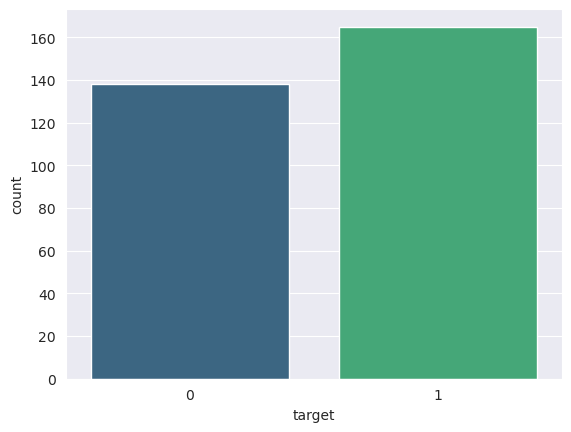

In [7]:
print(df.target.value_counts())
sns.set_style("darkgrid")
sns.countplot(x="target", data=df,palette="viridis");

In [8]:
print(df["sex"].value_counts())
# 1 represents "Male" and 0 represents "Female"

pd.crosstab(df["target"], df["sex"])

1    207
0     96
Name: sex, dtype: int64


sex,0,1
target,,
0,24,114
1,72,93


**Observation:** We can infer that in this given dataset, 72 Women and 93 Men have Heart Disease.

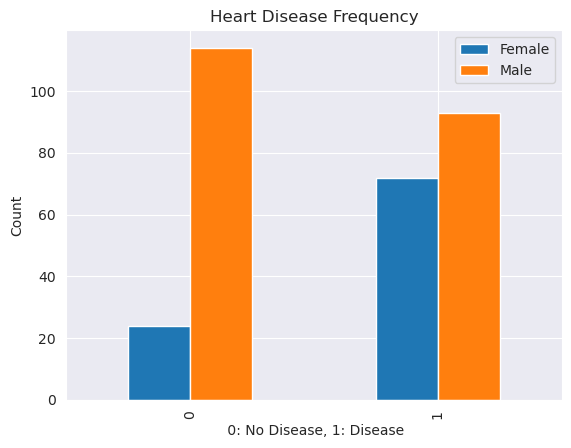

In [9]:
# Creating a plot for crosstab
pd.crosstab(df["target"], df["sex"]).plot(kind="bar")
plt.title("Heart Disease Frequency")
plt.xlabel(" 0: No Disease, 1: Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=90);

From the above barplot, we can conclude that **Males** are prone to having a heart disease as compared to **Females**. Also, it is observed, in this particular dataset, **Females** who have a heart disease is approximately three times more than **Females** who do not have a heart disease. 

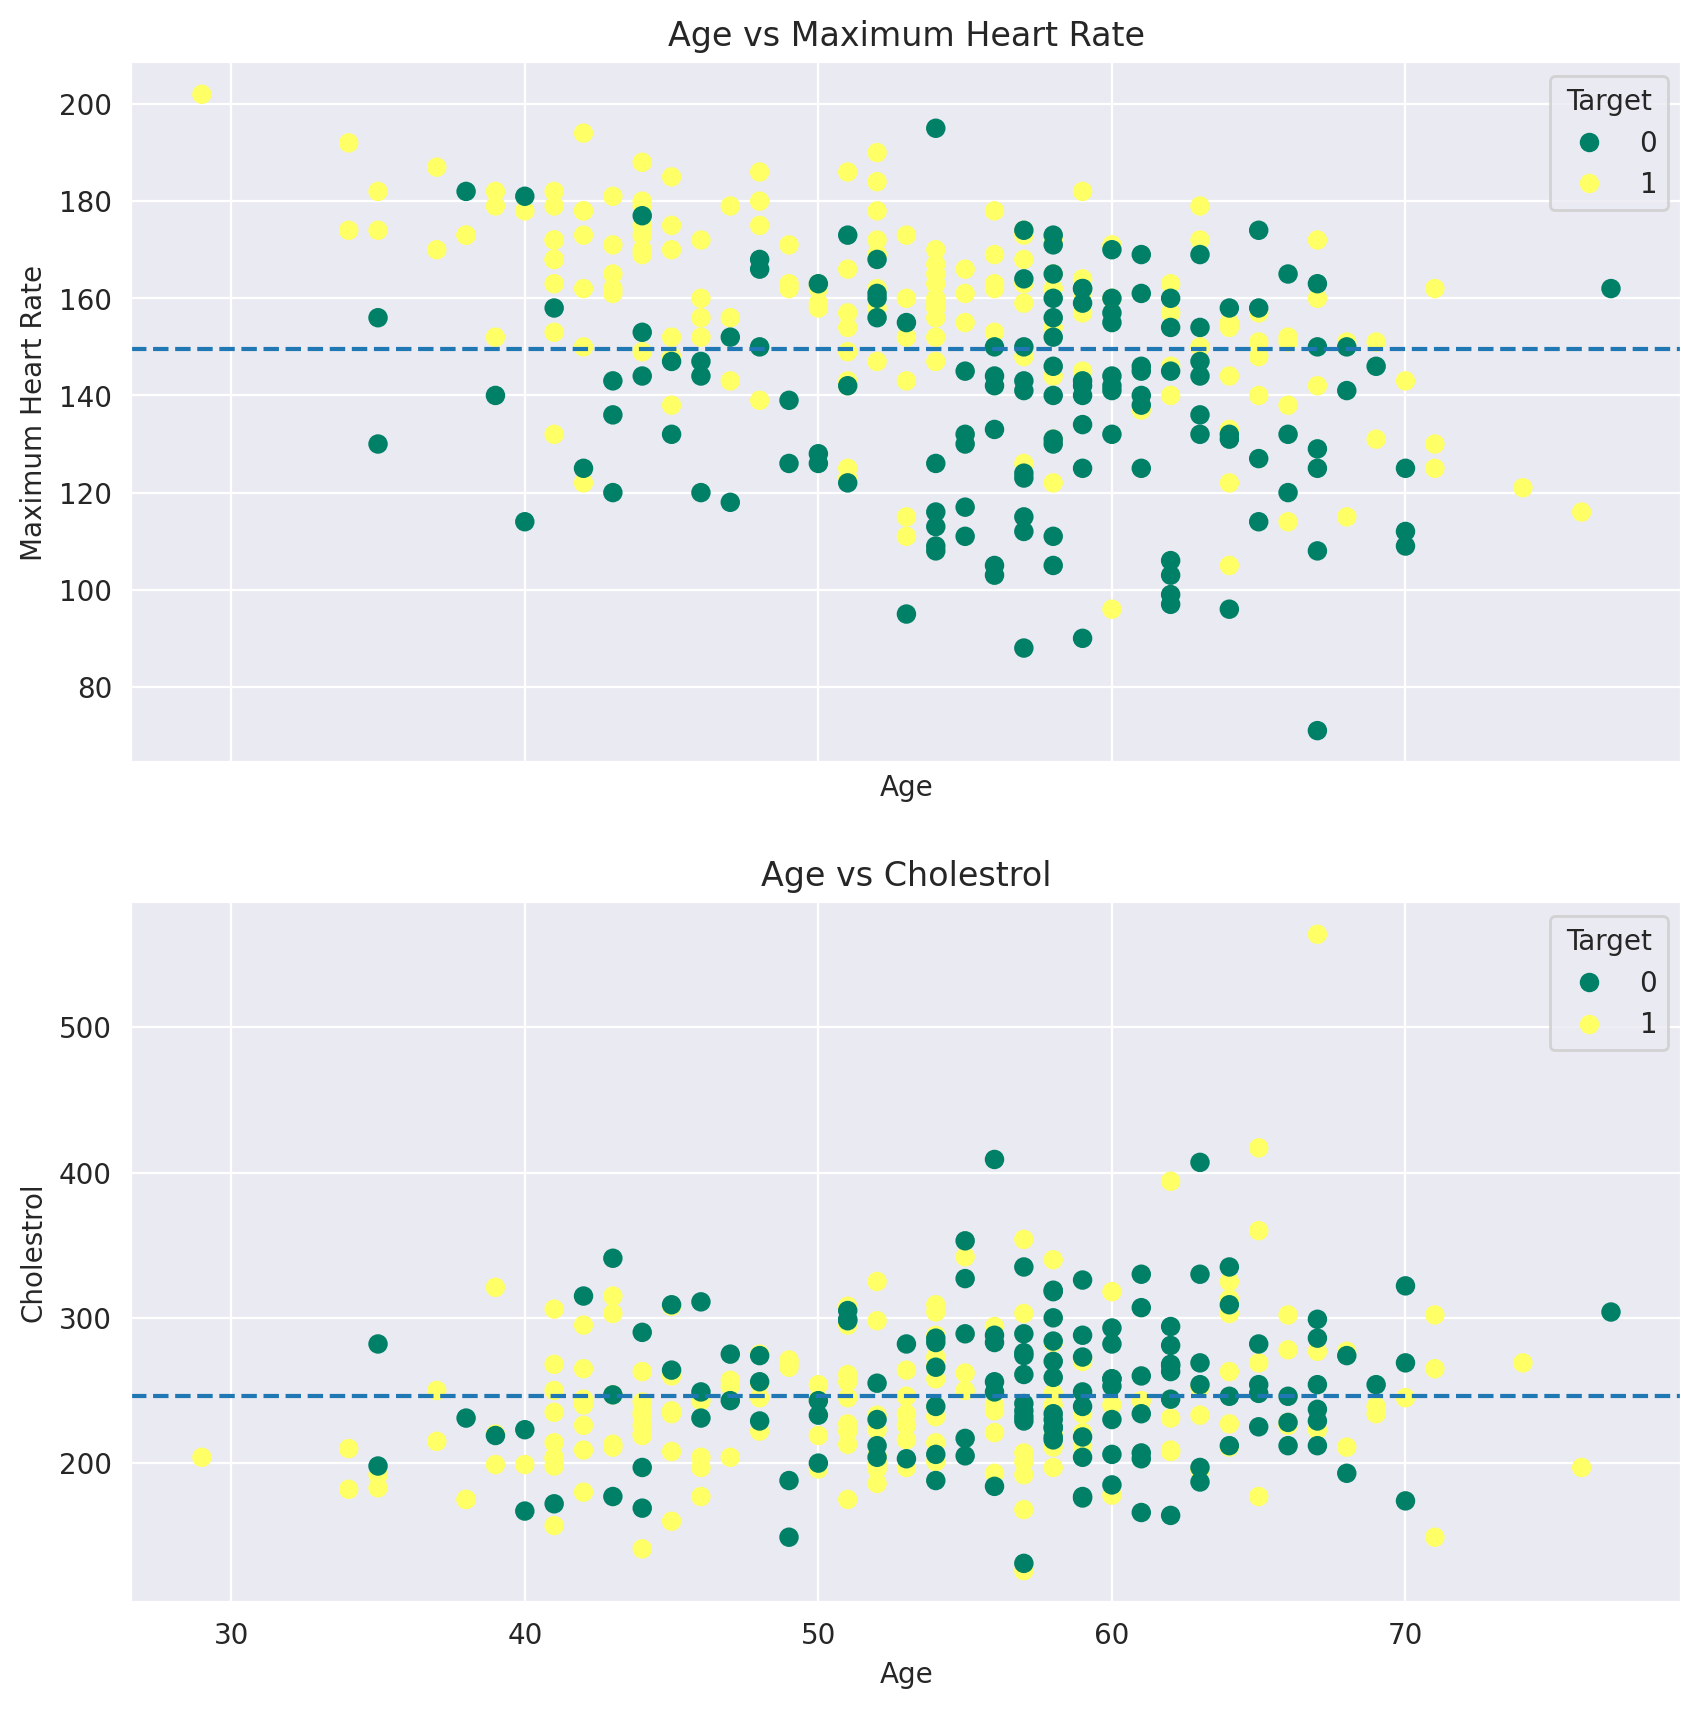

In [10]:
# Checking for total values in maximum heart rate and their unique values
df["thalach"].value_counts().unique()

#Creating a scatterplot for comparing maximum heart rate vs age
#Creating a scatterplot for comparing cholestrol vs age

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,10), dpi=200,
                             sharex=True)

scatter1 = ax1.scatter(x="age", y="thalach",data=df,
                          c="target",
                      cmap="summer")
ax1.set(title="Age vs Maximum Heart Rate",
       xlabel="Age",
       ylabel="Maximum Heart Rate")
ax1.legend(*scatter1.legend_elements(), title="Target")
ax1.axhline(df["thalach"].mean(), ls="--")

scatter2 = ax2.scatter(x="age", y="chol",data=df,
                          c="target",
                      cmap="summer")
ax2.set(title="Age vs Cholestrol",
       xlabel="Age",
       ylabel="Cholestrol")
ax2.legend(*scatter2.legend_elements(), title="Target")
ax2.axhline(df["chol"].mean(), ls="--");

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_29/1724756754.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


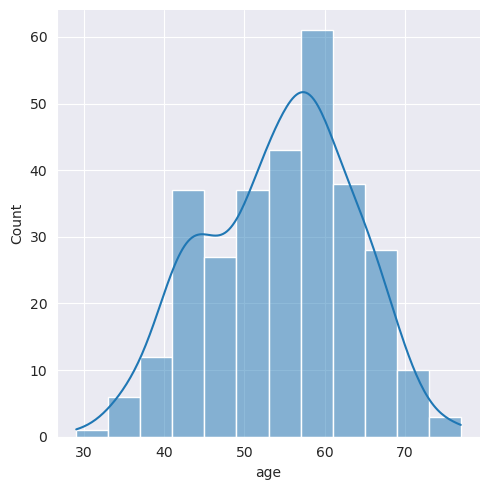

In [11]:
#Checking the distribution of "Age" feature
sns.displot(df["age"], kde=True)
plt.tight_layout()

<Axes: >

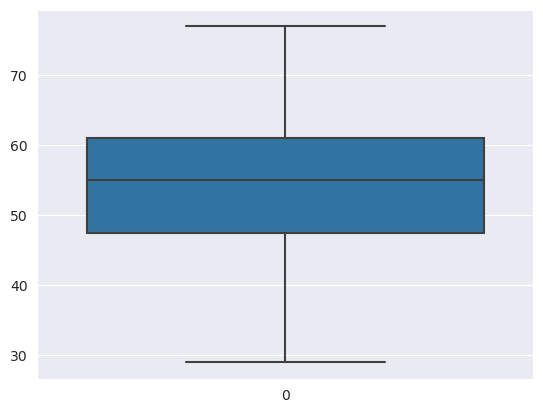

In [12]:
sns.boxplot(data=df["age"])

From the distribution plot, we can see **Age** follows a Normal distribution, and form the boxplot it can be said there are no outliers which can affect the end results.

**Box Plot Observation:**
1. Minimum age is around 30
2. First quartile is about 48
3. Median Age is 55
4. Third quartile is 62
3. Maximum age is 78

<Axes: >

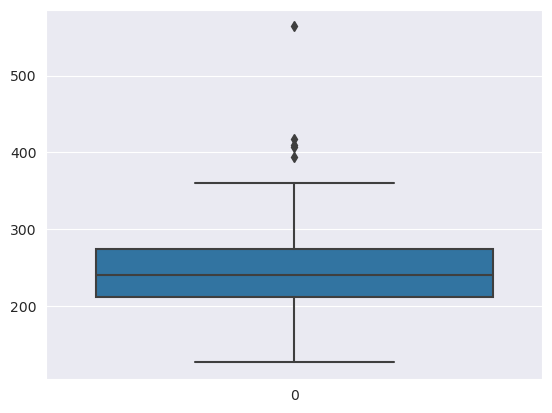

In [13]:
sns.boxplot(data=df["chol"])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


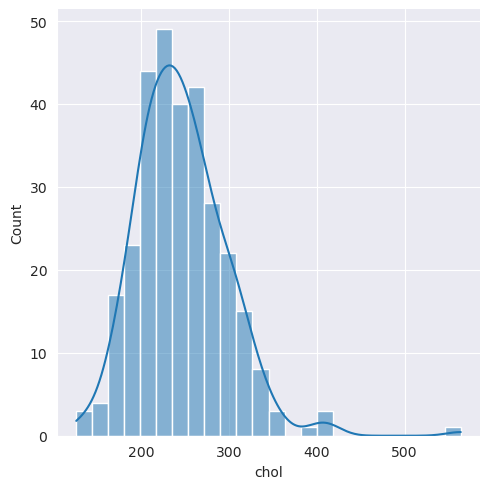

In [14]:
sns.displot(df["chol"], kde=True)

Here, it is seen there are some outliers, which potentially could be crucial in case of determining the heart disease. **Cholestrol** feature follows a log normal distribution. 

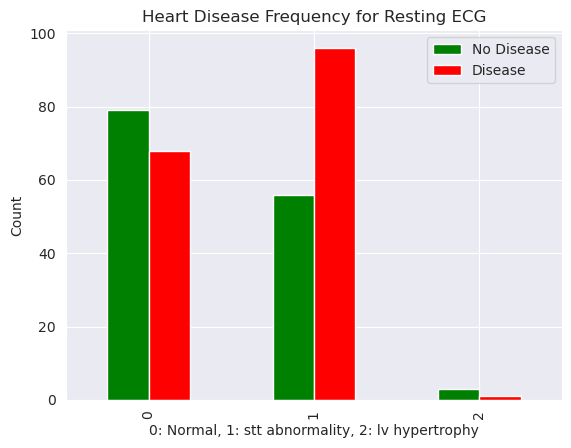

In [15]:
# Creating a plot of Resting ECG 
pd.crosstab(df["restecg"],df.target).plot(kind="bar", 
                                          color = ["green", "red"])
plt.title("Heart Disease Frequency for Resting ECG")
plt.xlabel("0: Normal, 1: stt abnormality, 2: lv hypertrophy")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"]);

Resting ECG is a non-invasive test that can detect abnormalities including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks.

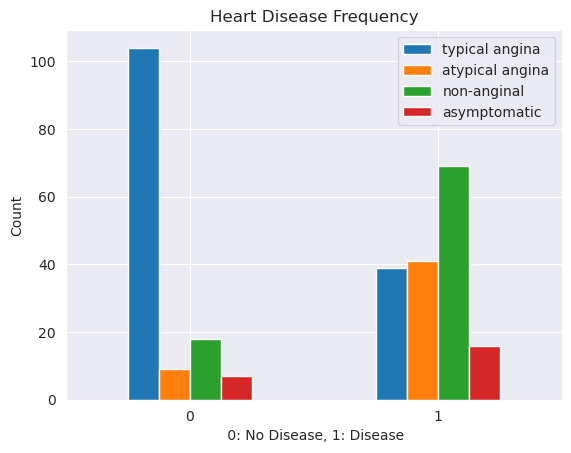

In [16]:
# Creating a plot for crosstab
pd.crosstab(df["target"], df["cp"]).plot(kind="bar")
plt.title("Heart Disease Frequency")
plt.xlabel(" 0: No Disease, 1: Disease")
plt.ylabel("Count")
plt.legend(["typical angina", "atypical angina",
            "non-anginal", "asymptomatic"])
plt.xticks(rotation=360);

In this particular dataset, individuals with non-anginal (non heart related) chest pain, tend to have a Heart Disease as compared to other types of chest pain. 

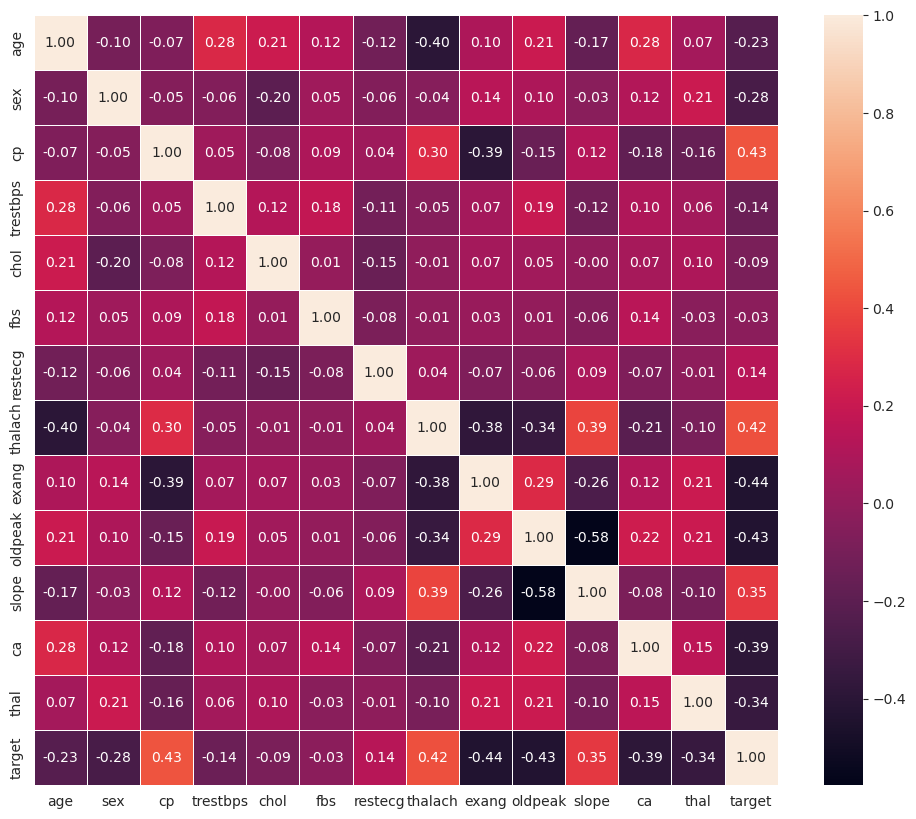

In [17]:
# For checking the correlation of features among different features
fig, ax = plt.subplots(figsize=(12,10), dpi=100)
ax= sns.heatmap(df.corr(), annot=True, linewidth=0.5, fmt=".2f");

## Model

In [18]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                   random_state=42)

#### 1. KNN Model

In [64]:

knn = KNeighborsClassifier()
param_grid = {"n_neighbors": range(1,41),
             "weights": ["uniform", "distance"],
              "algorithm":["auto", "ball_tree","kd_tree","brute"],
             "p":[1,2]}

grid1= GridSearchCV(knn,param_grid, cv=10)
grid1.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 41), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [65]:
grid1.best_params_

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

Axes(0.125,0.11;0.62x0.77)


              precision    recall  f1-score   support

           0       0.69      0.69      0.69        29
           1       0.72      0.72      0.72        32

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



Accuracy Score: 0.7049180327868853
Precision Score: 0.71875
Recall Score: 0.71875
F1 Score: 0.71875


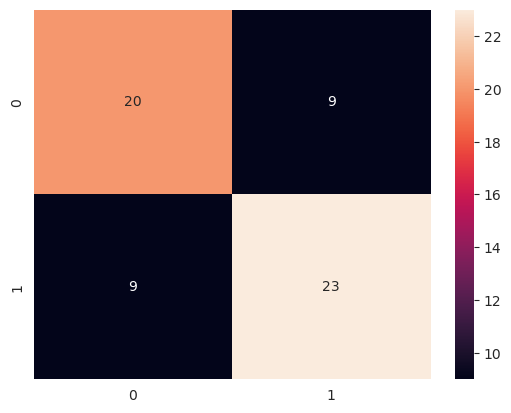

In [66]:
y_pred = grid1.predict(X_test)
print(sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt="g"))
print("\n")
print(classification_report(y_test, y_pred)) 
print("\n")
print(f"Accuracy Score: {accuracy_score(y_pred,y_test)}")
print(f"Precision Score: {precision_score(y_pred,y_test)}")
print(f"Recall Score: {recall_score(y_pred,y_test)}")
print(f"F1 Score: {f1_score(y_pred,y_test)}");
acc1 = accuracy_score(y_pred,y_test)
prec1 = precision_score(y_pred,y_test)
rec1 = recall_score(y_pred,y_test)
f11 = f1_score(y_pred,y_test)

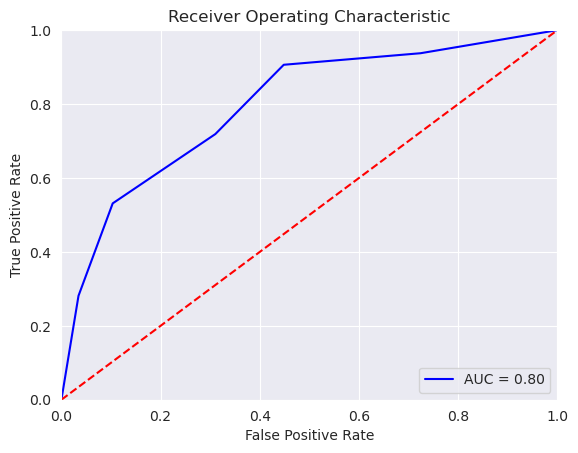

In [67]:
import sklearn.metrics as metrics
probs = grid1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc1 = metrics.auc(fpr, tpr)

#### 2. Support Vector Machine Model

In [68]:
svc = SVC()
param_grid = {"C": [0.1,0.01,0.001,0.5,1],
             "kernel": ["linear", "poly", "rbf", "sigmoid"],
              
             "degree":[2,3,4,5,6],
             "decision_function_shape": ["ovo","ovr"]}

grid2 = GridSearchCV(svc,param_grid, cv=10)
grid2.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 0.001, 0.5, 1],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [2, 3, 4, 5, 6],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [69]:
grid2.best_params_

{'C': 1, 'decision_function_shape': 'ovo', 'degree': 2, 'kernel': 'linear'}

Axes(0.125,0.11;0.62x0.77)


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Accuracy Score: 0.8688524590163934
Precision Score: 0.875
Recall Score: 0.875
F1 Score: 0.875


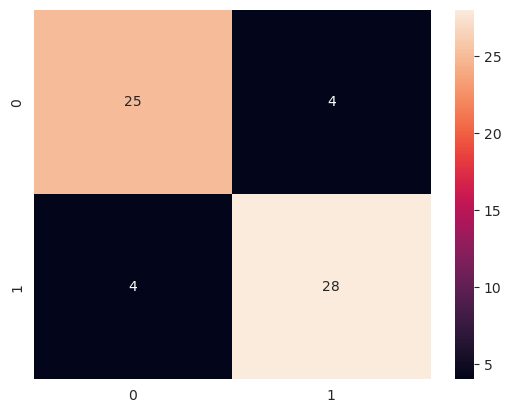

In [70]:
y_pred = grid2.predict(X_test)
print(sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt="g"))
print("\n")
print(classification_report(y_test, y_pred)) 
print("\n")
print(f"Accuracy Score: {accuracy_score(y_pred,y_test)}")
print(f"Precision Score: {precision_score(y_pred,y_test)}")
print(f"Recall Score: {recall_score(y_pred,y_test)}")
print(f"F1 Score: {f1_score(y_pred,y_test)}");
acc2 = accuracy_score(y_pred,y_test)
prec2 = precision_score(y_pred,y_test)
rec2 = recall_score(y_pred,y_test)
f12 = f1_score(y_pred,y_test)

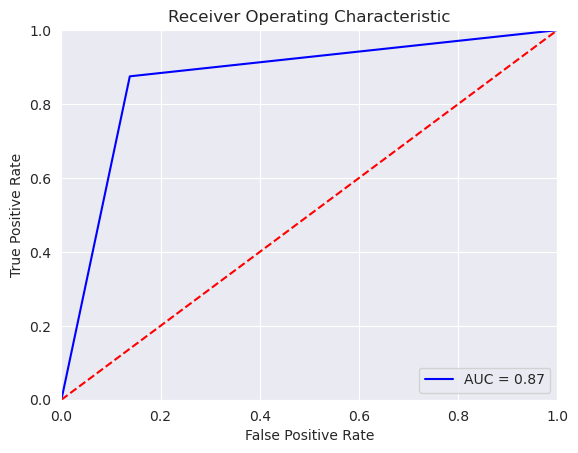

In [73]:
import sklearn.metrics as metrics
probs = grid2.predict(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc2 = metrics.auc(fpr, tpr)

#### 3. Decision Tree Model

In [75]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
param_grid = {"criterion": ["gini", "entropy", "log_loss"],
             "max_features": ["auto", "sqrt", "log2"],
              
             "max_depth":[2,3,4,5,6],
             "max_leaf_nodes": [2,3,4,5,6]}

grid3 = GridSearchCV(decision,param_grid, cv=10)
grid3.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/pytho

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6]})

In [76]:
grid3.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': 6}

In [77]:
grid3.best_estimator_.feature_importances_

array([0.        , 0.13048387, 0.12232939, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.51468478,
       0.        , 0.23250196, 0.        ])

In [78]:
pd.DataFrame(index=X.columns, data = grid3.best_estimator_.feature_importances_,
            columns=(["Feature Importance"]))

,Feature Importance
age,0.000000
sex,0.130484
cp,0.122329
trestbps,0.000000
chol,0.000000
fbs,0.000000
restecg,0.000000
thalach,0.000000
exang,0.000000
oldpeak,0.514685


Axes(0.125,0.11;0.62x0.77)


              precision    recall  f1-score   support

           0       0.69      0.76      0.72        29
           1       0.76      0.69      0.72        32

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



Accuracy Score: 0.7213114754098361
Precision Score: 0.6875
Recall Score: 0.7586206896551724
F1 Score: 0.7213114754098361


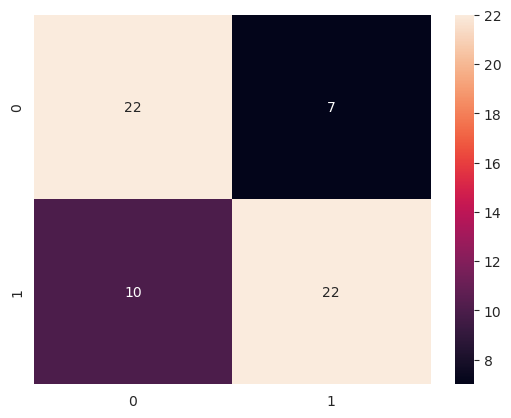

In [79]:
y_pred = grid3.predict(X_test)
print(sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt="g"))
print("\n")
print(classification_report(y_test, y_pred)) 
print("\n")
print(f"Accuracy Score: {accuracy_score(y_pred,y_test)}")
print(f"Precision Score: {precision_score(y_pred,y_test)}")
print(f"Recall Score: {recall_score(y_pred,y_test)}")
print(f"F1 Score: {f1_score(y_pred,y_test)}");
acc3 = accuracy_score(y_pred,y_test)
prec3 = precision_score(y_pred,y_test)
rec3 = recall_score(y_pred,y_test)
f13 = f1_score(y_pred,y_test)

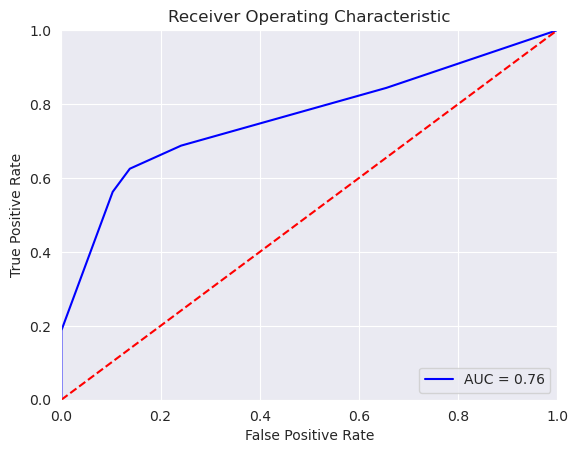

In [115]:
import sklearn.metrics as metrics
probs = grid3.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc3 = metrics.auc(fpr, tpr)

#### 4. Random Forest Classifier Model

In [81]:
rfc = RandomForestClassifier()
param_grid = {"n_estimators": [64,100,128,200],
             "criterion": ["gini","entropy","log_loss"],
             "max_depth": [2,3,4,5,6],
             "max_features": ["sqrt", "log2"],
             "bootstrap": [True, False],
             "oob_score": [True, False],
             "class_weight": ["balanced"]}

grid4 = GridSearchCV(rfc,param_grid, cv=10)
grid4.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1200 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/opt/con

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [82]:
grid4.best_params_

{'bootstrap': False,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'log2',
 'n_estimators': 200,
 'oob_score': False}

In [83]:
pd.DataFrame(index=X.columns, 
             data = grid3.best_estimator_.feature_importances_,
            columns=(["Feature Importance"]))

,Feature Importance
age,0.000000
sex,0.130484
cp,0.122329
trestbps,0.000000
chol,0.000000
fbs,0.000000
restecg,0.000000
thalach,0.000000
exang,0.000000
oldpeak,0.514685


Axes(0.125,0.11;0.62x0.77)


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Accuracy Score: 0.8688524590163934
Precision Score: 0.875
Recall Score: 0.875
F1 Score: 0.875


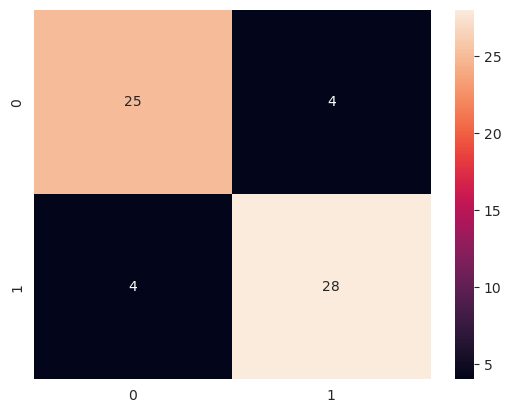

In [84]:
y_pred = grid4.predict(X_test)
print(sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt="g"))
print("\n")
print(classification_report(y_test, y_pred)) 
print("\n")
print(f"Accuracy Score: {accuracy_score(y_pred,y_test)}")
print(f"Precision Score: {precision_score(y_pred,y_test)}")
print(f"Recall Score: {recall_score(y_pred,y_test)}")
print(f"F1 Score: {f1_score(y_pred,y_test)}");
acc4 = accuracy_score(y_pred,y_test)
prec4 = precision_score(y_pred,y_test)
rec4 = recall_score(y_pred,y_test)
f14 = f1_score(y_pred,y_test)

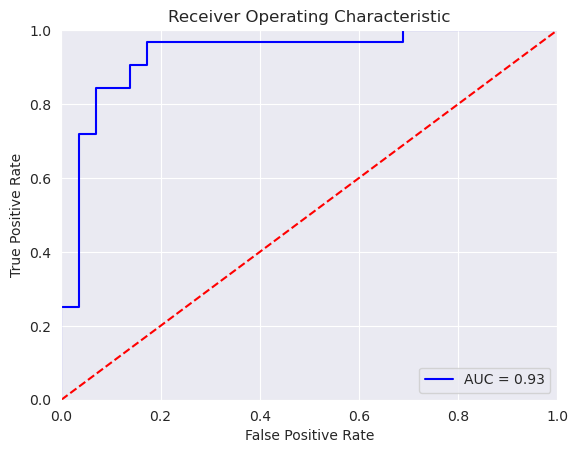

In [91]:
import sklearn.metrics as metrics
probs = grid4.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc4 = metrics.auc(fpr, tpr)

#### 5. Adaboost Model

In [88]:
ada = AdaBoostClassifier()
param_grid = {"n_estimators": [64,100,128,200],
             
             "learning_rate": [0.1,0.01,0.001,0.0001],
             }

grid5 = GridSearchCV(ada,param_grid, cv=10)
grid5.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'n_estimators': [64, 100, 128, 200]})

Axes(0.125,0.11;0.62x0.77)


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Accuracy Score: 0.8852459016393442
Precision Score: 0.90625
Recall Score: 0.8787878787878788
F1 Score: 0.8923076923076922


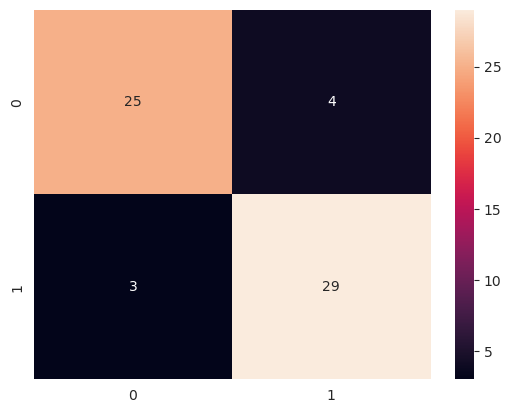

In [92]:
y_pred = grid5.predict(X_test)
print(sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt="g"))
print("\n")
print(classification_report(y_test, y_pred)) 
print("\n")
print(f"Accuracy Score: {accuracy_score(y_pred,y_test)}")
print(f"Precision Score: {precision_score(y_pred,y_test)}")
print(f"Recall Score: {recall_score(y_pred,y_test)}")
print(f"F1 Score: {f1_score(y_pred,y_test)}");
acc5 = accuracy_score(y_pred,y_test)
prec5 = precision_score(y_pred,y_test)
rec5 = recall_score(y_pred,y_test)
f15 = f1_score(y_pred,y_test)

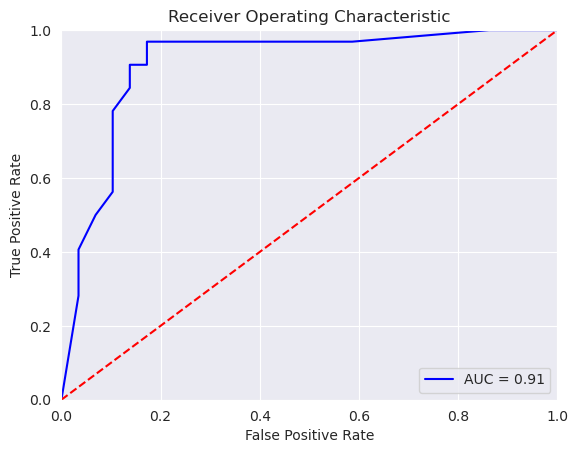

In [93]:
import sklearn.metrics as metrics
probs = grid5.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc5 = metrics.auc(fpr, tpr)

## Model Metrics Comparison

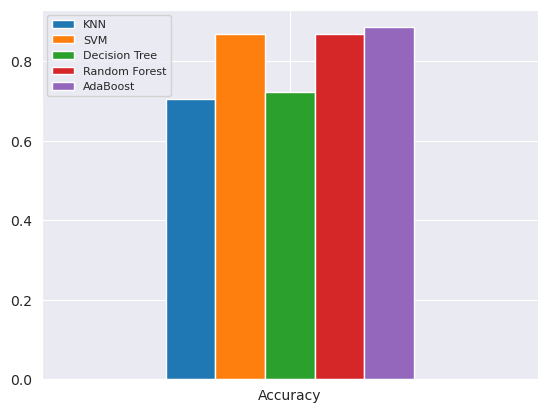

In [107]:
accuracy = [acc1,acc2,acc3,acc4, acc5]
plt.figsize=(10,6)
model_accuracy = pd.DataFrame(accuracy, columns=["Accuracy"],
                             index=["KNN","SVM", "Decision Tree", 
                                    "Random Forest", "AdaBoost"])
model_accuracy.T.plot.bar()
plt.xticks(rotation=360)
plt.legend(loc="upper left",prop={'size': 8});

[0.71875, 0.875, 0.6875, 0.875, 0.90625]

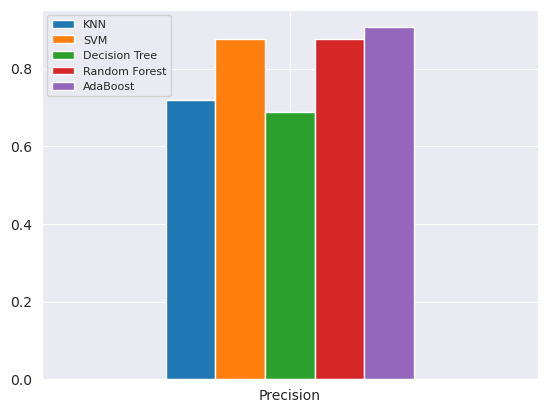

In [109]:
precision = [prec1,prec2,prec3,prec4, prec5]
plt.figsize=(10,6)
model_precision = pd.DataFrame(precision, columns=["Precision"],
                             index=["KNN","SVM", "Decision Tree", 
                                    "Random Forest", "AdaBoost"])
model_precision.T.plot.bar()
plt.xticks(rotation=360)
plt.legend(loc="upper left",prop={'size': 8});

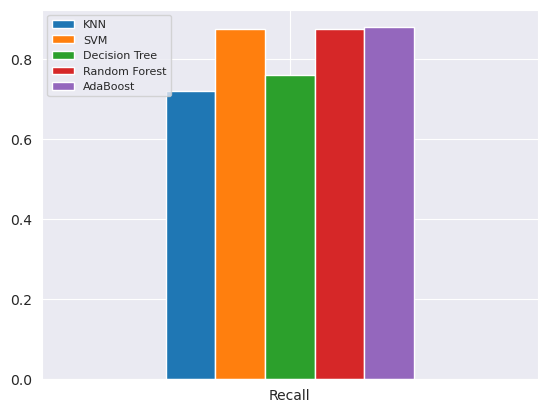

In [110]:
recall = [rec1,rec2,rec3,rec4, rec5]
plt.figsize=(10,6)
model_recall = pd.DataFrame(recall, columns=["Recall"],
                             index=["KNN","SVM", "Decision Tree", 
                                    "Random Forest", "AdaBoost"])
model_recall.T.plot.bar()
plt.xticks(rotation=360)
plt.legend(loc="upper left",prop={'size': 8});

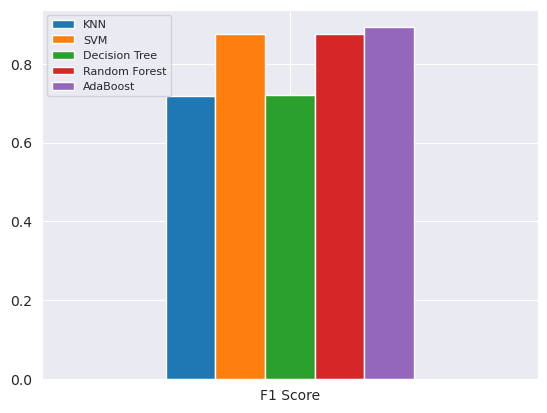

In [113]:
f1_score = [f11,f12,f13,f14, f15]
plt.figsize=(10,6)
model_f1_score = pd.DataFrame(f1_score, columns=["F1 Score"],
                             index=["KNN","SVM", "Decision Tree", 
                                    "Random Forest", "AdaBoost"])
model_f1_score.T.plot.bar()
plt.xticks(rotation=360)
plt.legend(loc="upper left",prop={'size': 8});


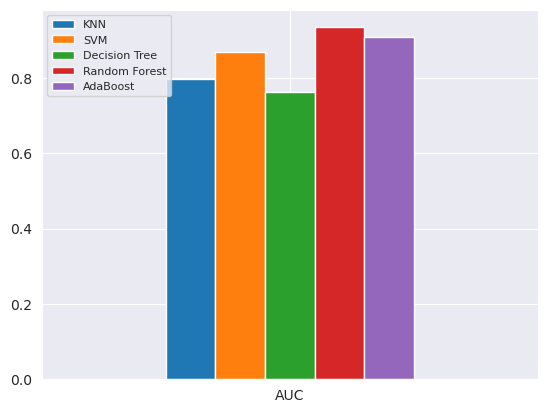

In [116]:
auc = [auc1,auc2,auc3,auc4, auc5]
plt.figsize=(10,6)
model_auc = pd.DataFrame(auc, columns=["AUC"],
                             index=["KNN","SVM", "Decision Tree", 
                                    "Random Forest", "AdaBoost"])
model_auc.T.plot.bar()
plt.xticks(rotation=360)
plt.legend(loc="upper left",prop={'size': 8});

#### Saving a model

In [118]:
from joblib import dump, load
dump(grid1, filename="gs_knn_heart_disease_model.joblib")

['gs_knn_heart_disease_model.joblib']

In [119]:
dump(grid2, filename="gs_svc_heart_disease_model.joblib")

['gs_svc_heart_disease_model.joblib']

In [120]:
dump(grid3, filename="gs_decision_tree_heart_disease_model.joblib")

['gs_decision_tree_heart_disease_model.joblib']

In [121]:
dump(grid4, filename="gs_random_forest_heart_disease_model.joblib")

['gs_random_forest_heart_disease_model.joblib']

In [122]:
dump(grid5, filename="gs_adaboost_heart_disease_model.joblib")

['gs_adaboost_heart_disease_model.joblib']